# Analysing the Best Weights Results 

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import ast
import os
import cv2
import numpy as np
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
def data_processing_pipeline(folder_name):
    train_path = "/Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/" + folder_name + "/train"
    val_path = "/Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/" + folder_name + "/val"
    test_path = "/Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/" + folder_name +"/test"


    # In[37]:


    #initialising the generator 
    train_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_path, batch_size=16, class_mode='categorical')
    val_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(val_path, batch_size=16, class_mode='categorical')
    test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_path, batch_size=1, class_mode='categorical')


    # In[38]:


    print('train_generator.class_indices:\n',train_generator.class_indices)


    # In[39]:

    train_y = train_generator.classes
    val_y = val_generator.classes
    test_y = test_generator.classes

    print('train_generator.labels:\n', train_generator.labels)
    print("Dimension of labels:", len(train_generator.labels))


    # In[40]:


    #generate the size of the  train images
    print('Shape of image:',train_generator.image_shape)
    
    print("Test Path:", test_path)
    
    return test_generator

In [7]:
!pwd

/Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Codes/NSCC/cropped_imgs/SST


In [8]:
def model_score(folder_name, test_gen):
    CWD = os.getcwd()
    DIR = os.path.join(CWD,folder_name)
    os.chdir(DIR)
    model_name = folder_name + "_sst_resnet50.h5"
    print("Model Name:", model_name)
    model = tf.keras.models.load_model(model_name)
    score = model.evaluate(test_gen)
    
    loss = score[0] 
    accuracy = score[1] * 100
    
    os.chdir(CWD)
    
    return loss, accuracy

In [9]:
def best_model_score(folder_name, test_gen):
    CWD = os.getcwd()
    DIR = os.path.join(CWD,folder_name)
    os.chdir(DIR)
    model_name = "best_weight.h5"
    
    model = tf.keras.models.load_model(model_name)
    score = model.evaluate(test_gen)
    
    loss = score[0] 
    accuracy = score[1] * 100
    
    os.chdir(CWD)
    return loss, accuracy

## S1

### test_gen = data_processing_pipeline('s1')
s1_model_loss, s1_model_accuracy = model_score('s1',test_gen)
s1_best_loss, s1_best_accuracy = best_model_score('s1', test_gen)

s1_best_accuracy = round(s1_best_accuracy,2)
s1_model_accuracy = round(s1_model_accuracy,2)

s1_model_loss = round(s1_model_loss,2)
s1_best_loss = round(s1_best_loss,2)

print("S1: Model Score:", s1_model_accuracy)
print("S1: Best Score:", s1_best_accuracy)

### Analysing the Curves

In [7]:
#Analysing the Curves
with open('/Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Codes/NSCC/cropped_imgs/SST/s1/history_s1_sst.txt') as f:
    data = f.read()

In [8]:
saved_history = ast.literal_eval(data)
print("Type:", type(saved_history))
saved_history

Type: <class 'dict'>


{'loss': [1.5437272787094116,
  1.3157854080200195,
  1.1901419162750244,
  1.0878384113311768,
  0.9845992922782898,
  0.8747288584709167,
  0.7875945568084717,
  0.7303200364112854,
  0.6570574641227722,
  0.5548070669174194,
  0.5192238092422485,
  0.463064581155777,
  0.4230981767177582,
  0.34149158000946045,
  0.32019302248954773,
  0.277667760848999,
  0.24349138140678406,
  0.2189158797264099,
  0.21696749329566956,
  0.19365303218364716,
  0.16036514937877655,
  0.1538270115852356,
  0.13961757719516754,
  0.12022314965724945,
  0.12857738137245178,
  0.11257374286651611,
  0.10019005089998245,
  0.0833825096487999,
  0.10518737137317657,
  0.0897066742181778,
  0.08270787447690964,
  0.07555273920297623,
  0.09942682832479477,
  0.07328341156244278,
  0.05363858863711357,
  0.08523892611265182,
  0.059682510793209076,
  0.0577038899064064,
  0.09753898531198502,
  0.09042297303676605,
  0.040985964238643646,
  0.05714251846075058,
  0.058961883187294006,
  0.03969722241163254

In [9]:
len(saved_history['loss'])

500

In [10]:
training_loss = saved_history['loss']
val_loss = saved_history['val_loss']

training_accuracy = saved_history['categorical_accuracy']
val_accuracy = saved_history['val_categorical_accuracy']

epochs = range(1,501)

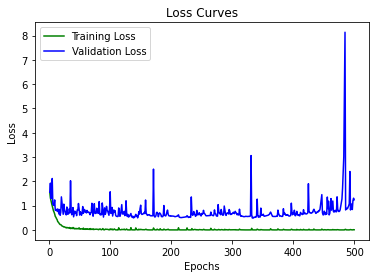

In [11]:
#Plotting the Loss Curves
plt.plot(epochs, training_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

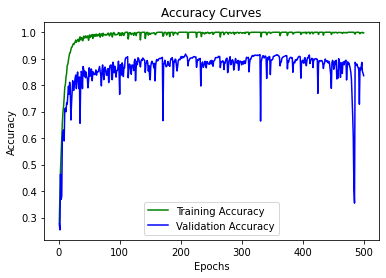

In [12]:
#Plotting the Accuracy Curves
plt.plot(epochs, training_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Can see that we have overtrained a bit, the ideal is around 475-480. However, we will stick to 500 epochs to standardise the parameters and then take the best weight from there.

In [22]:
os.chdir('/Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Codes/NSCC/cropped_imgs/STFT/')

## S2

In [11]:
test_gen = data_processing_pipeline('s2')
s2_model_loss, s2_model_accuracy = model_score('s2',test_gen)
s2_best_loss, s2_best_accuracy = best_model_score('s2', test_gen)

s2_model_accuracy = round(s2_model_accuracy,2)
s2_best_accuracy = round(s2_best_accuracy,2)

s2_model_loss = round(s2_model_loss,2)
s2_best_loss = round(s2_best_loss,2)

print("S2: Model Score:", s2_model_accuracy)
print("S2: Best Score:", s2_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s2/test
Model Name: s2_sst_resnet50.h5


2022-05-27 11:31:04.871628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 21s 20ms/step - loss: 1.4340 - categorical_accuracy: 0.8181


2022-05-27 11:31:26.988607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 21s 20ms/step - loss: 1.2746 - categorical_accuracy: 0.8191
S2: Model Score: 81.81
S2: Best Score: 81.91


## S3

In [12]:
test_gen = data_processing_pipeline('s3')
s3_model_loss, s3_model_accuracy = model_score('s3',test_gen)
s3_best_loss, s3_best_accuracy = best_model_score('s3', test_gen)

s3_model_accuracy = round(s3_model_accuracy,2)
s3_best_accuracy = round(s3_best_accuracy,2)

s3_model_loss = round(s3_model_loss,2)
s3_best_loss = round(s3_best_loss,2)

print("S3: Model Score:", s3_model_accuracy)
print("S3: Best Score:", s3_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s3/test
Model Name: s3_sst_resnet50.h5


2022-05-27 11:31:49.143178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 21s 20ms/step - loss: 8.4581 - categorical_accuracy: 0.3117


2022-05-27 11:32:11.216988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 21s 20ms/step - loss: 0.7335 - categorical_accuracy: 0.8771
S3: Model Score: 31.17
S3: Best Score: 87.71


## S4

In [13]:
test_gen = data_processing_pipeline('s4')
s4_model_loss, s4_model_accuracy = model_score('s4',test_gen)
s4_best_loss, s4_best_accuracy = best_model_score('s4', test_gen)

s4_model_accuracy = round(s4_model_accuracy,2)
s4_best_accuracy = round(s4_best_accuracy,2)

s4_model_loss = round(s4_model_loss,2)
s4_best_loss = round(s4_best_loss,2)

print("S4: Model Score:", s4_model_accuracy)
print("S4: Best Score:", s4_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s4/test
Model Name: s4_sst_resnet50.h5


2022-05-27 11:32:33.140569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 21s 20ms/step - loss: 1.1946 - categorical_accuracy: 0.8348


2022-05-27 11:32:55.267219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 21s 20ms/step - loss: 0.8693 - categorical_accuracy: 0.8555
S4: Model Score: 83.48
S4: Best Score: 85.55


## S5

In [14]:
test_gen = data_processing_pipeline('s5')
s5_model_loss, s5_model_accuracy = model_score('s5',test_gen)
s5_best_loss, s5_best_accuracy = best_model_score('s5', test_gen)

s5_model_accuracy = round(s5_model_accuracy,2)
s5_best_accuracy = round(s5_best_accuracy,2)

s5_model_loss = round(s5_model_loss,2)
s5_best_loss = round(s5_best_loss,2)

print("S5: Model Score:", s5_model_accuracy)
print("S5: Best Score:", s5_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s5/test
Model Name: s5_sst_resnet50.h5


2022-05-27 11:33:18.163790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 22s 21ms/step - loss: 2.6448 - categorical_accuracy: 0.5497


2022-05-27 11:33:41.499718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 22s 21ms/step - loss: 0.8849 - categorical_accuracy: 0.8653
S5: Model Score: 54.97
S5: Best Score: 86.53


## S6

In [15]:
test_gen = data_processing_pipeline('s6')
exit(1)
s6_model_loss, s6_model_accuracy = model_score('s6',test_gen)
s6_best_loss, s6_best_accuracy = best_model_score('s6', test_gen)

s6_best_accuracy = round(s6_best_accuracy,2)
s6_model_accuracy = round(s6_model_accuracy,2)

s6_model_loss = round(s6_model_loss,2)
s6_best_loss = round(s6_best_loss,2)

print("s6: Model Score:", s6_model_accuracy)
print("s6: Best Score:", s6_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s6/test
Model Name: s6_sst_resnet50.h5


2022-05-27 11:34:04.897317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 22s 21ms/step - loss: 2.2850 - categorical_accuracy: 0.6657


2022-05-27 11:34:28.165530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 23s 21ms/step - loss: 0.0544 - categorical_accuracy: 0.9921
s6: Model Score: 66.57
s6: Best Score: 99.21


## S7

In [16]:
test_gen = data_processing_pipeline('s7')
s7_model_loss, s7_model_accuracy = model_score('s7',test_gen)
s7_best_loss, s7_best_accuracy = best_model_score('s7', test_gen)

s7_best_accuracy = round(s7_best_accuracy,2)
s7_model_accuracy = round(s7_model_accuracy,2)

s7_model_loss = round(s7_model_loss,2)
s7_best_loss = round(s7_best_loss,2)

print("s7: Model Score:", s7_model_accuracy)
print("s7: Best Score:", s7_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s7/test
Model Name: s7_sst_resnet50.h5


2022-05-27 11:34:52.004898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 23s 22ms/step - loss: 8.7513 - categorical_accuracy: 0.2124


2022-05-27 11:35:16.267823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 23s 22ms/step - loss: 0.5733 - categorical_accuracy: 0.9076
s7: Model Score: 21.24
s7: Best Score: 90.76


## S8

In [17]:
test_gen = data_processing_pipeline('s8')
s8_model_loss, s8_model_accuracy = model_score('s8',test_gen)
s8_best_loss, s8_best_accuracy = best_model_score('s8', test_gen)

s8_best_accuracy = round(s8_best_accuracy,2)
s8_model_accuracy = round(s8_model_accuracy,2)

s8_model_loss = round(s8_model_loss,2)
s8_best_loss = round(s8_best_loss,2)

print("s8: Model Score:", s8_model_accuracy)
print("s8: Best Score:", s8_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s8/test
Model Name: s8_sst_resnet50.h5


2022-05-27 11:35:40.494887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 23s 22ms/step - loss: 123.2365 - categorical_accuracy: 0.2458


2022-05-27 11:36:04.794123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 24s 22ms/step - loss: 0.2253 - categorical_accuracy: 0.9449
s8: Model Score: 24.58
s8: Best Score: 94.49


## S9

In [18]:
test_gen = data_processing_pipeline('s9')
s9_model_loss, s9_model_accuracy = model_score('s9',test_gen)
s9_best_loss, s9_best_accuracy = best_model_score('s9', test_gen)

s9_best_accuracy = round(s9_best_accuracy,2)
s9_model_accuracy = round(s9_model_accuracy,2)

s9_model_loss = round(s9_model_loss,2)
s9_best_loss = round(s9_best_loss,2)

print("s9: Model Score:", s9_model_accuracy)
print("s9: Best Score:", s9_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s9/test
Model Name: s9_sst_resnet50.h5


2022-05-27 11:36:29.921666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 24s 23ms/step - loss: 2.0982 - categorical_accuracy: 0.7424


2022-05-27 11:36:54.987203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 23s 22ms/step - loss: 1.6262 - categorical_accuracy: 0.7827
s9: Model Score: 74.24
s9: Best Score: 78.27


## S10

In [19]:
test_gen = data_processing_pipeline('s10')
s10_model_loss, s10_model_accuracy = model_score('s10',test_gen)
s10_best_loss, s10_best_accuracy = best_model_score('s10', test_gen)

s10_best_accuracy = round(s10_best_accuracy,2)
s10_model_accuracy = round(s10_model_accuracy,2)

s10_model_loss = round(s10_model_loss,2)
s10_best_loss = round(s10_best_loss,2)

print("s10: Model Score:", s10_model_accuracy)
print("s10: Best Score:", s10_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s10/test
Model Name: s10_sst_resnet50.h5


2022-05-27 11:37:20.029199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 23s 22ms/step - loss: 6.1468 - categorical_accuracy: 0.2124


2022-05-27 11:37:44.852865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 24s 23ms/step - loss: 0.2016 - categorical_accuracy: 0.9715
s10: Model Score: 21.24
s10: Best Score: 97.15


## S11

In [20]:
test_gen = data_processing_pipeline('s11')
s11_model_loss, s11_model_accuracy = model_score('s11',test_gen)
s11_best_loss, s11_best_accuracy = best_model_score('s11', test_gen)

s11_best_accuracy = round(s11_best_accuracy,2)
s11_model_accuracy = round(s11_model_accuracy,2)

s11_model_loss = round(s11_model_loss,2)
s11_best_loss = round(s11_best_loss,2)

print("s11: Model Score:", s11_model_accuracy)
print("s11: Best Score:", s11_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s11/test
Model Name: s11_sst_resnet50.h5


2022-05-27 11:38:10.773701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 24s 23ms/step - loss: 5.7283 - categorical_accuracy: 0.4680


2022-05-27 11:38:36.126274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 24s 23ms/step - loss: 1.6670 - categorical_accuracy: 0.7591
s11: Model Score: 46.8
s11: Best Score: 75.91


## S12

In [21]:
test_gen = data_processing_pipeline('s12')
s12_model_loss, s12_model_accuracy = model_score('s12',test_gen)
s12_best_loss, s12_best_accuracy = best_model_score('s12', test_gen)

s12_best_accuracy = round(s12_best_accuracy,2)
s12_model_accuracy = round(s12_model_accuracy,2)

s12_model_loss = round(s12_model_loss,2)
s12_best_loss = round(s12_best_loss,2)

print("s12: Model Score:", s12_model_accuracy)
print("s12: Best Score:", s12_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s12/test
Model Name: s12_sst_resnet50.h5


2022-05-27 11:39:01.366942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 25s 23ms/step - loss: 8.8104 - categorical_accuracy: 0.3933


2022-05-27 11:39:27.606391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 26s 25ms/step - loss: 0.3394 - categorical_accuracy: 0.9351
s12: Model Score: 39.33
s12: Best Score: 93.51


## S13

In [22]:
test_gen = data_processing_pipeline('s13')
s13_model_loss, s13_model_accuracy = model_score('s13',test_gen)
s13_best_loss, s13_best_accuracy = best_model_score('s13', test_gen)

s13_best_accuracy = round(s13_best_accuracy,2)
s13_model_accuracy = round(s13_model_accuracy,2)

s13_model_loss = round(s13_model_loss,2)
s13_best_loss = round(s13_best_loss,2)

print("s13: Model Score:", s13_model_accuracy)
print("s13: Best Score:", s13_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s13/test
Model Name: s13_sst_resnet50.h5


2022-05-27 11:39:55.368354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 26s 24ms/step - loss: 1.8773 - categorical_accuracy: 0.7119


2022-05-27 11:40:22.299333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 25s 24ms/step - loss: 0.5998 - categorical_accuracy: 0.8997
s13: Model Score: 71.19
s13: Best Score: 89.97


## S14

In [23]:
test_gen = data_processing_pipeline('s14')
s14_model_loss, s14_model_accuracy = model_score('s14',test_gen)
s14_best_loss, s14_best_accuracy = best_model_score('s14', test_gen)

s14_best_accuracy = round(s14_best_accuracy,2)
s14_model_accuracy = round(s14_model_accuracy,2)

s14_model_loss = round(s14_model_loss,2)
s14_best_loss = round(s14_best_loss,2)

print("s14: Model Score:", s14_model_accuracy)
print("s14: Best Score:", s14_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s14/test
Model Name: s14_sst_resnet50.h5


2022-05-27 11:40:48.745212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 26s 25ms/step - loss: 68.3469 - categorical_accuracy: 0.2704


2022-05-27 11:41:16.249767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 26s 25ms/step - loss: 0.2982 - categorical_accuracy: 0.9440
s14: Model Score: 27.04
s14: Best Score: 94.4


## S15

In [24]:
test_gen = data_processing_pipeline('s15')
s15_model_loss, s15_model_accuracy = model_score('s15',test_gen)
s15_best_loss, s15_best_accuracy = best_model_score('s15', test_gen)

s15_best_accuracy = round(s15_best_accuracy,2)
s15_model_accuracy = round(s15_model_accuracy,2)

s15_model_loss = round(s15_model_loss,2)
s15_best_loss = round(s15_best_loss,2)

print("s15: Model Score:", s15_model_accuracy)
print("s15: Best Score:", s15_best_accuracy)

Found 7083 images belonging to 4 classes.
Found 2023 images belonging to 4 classes.
Found 1017 images belonging to 4 classes.
train_generator.class_indices:
 {'0_neutral': 0, '1_sad': 1, '2_fear': 2, '3_happy': 3}
train_generator.labels:
 [0 0 0 ... 3 3 3]
Dimension of labels: 7083
Shape of image: (256, 256, 3)
Test Path: /Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subject_dependent_sst/s15/test
Model Name: s15_sst_resnet50.h5


2022-05-27 11:41:43.897157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 27s 26ms/step - loss: 3.9407 - categorical_accuracy: 0.4395


2022-05-27 11:42:12.150925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 26s 25ms/step - loss: 0.3797 - categorical_accuracy: 0.9272
s15: Model Score: 43.95
s15: Best Score: 92.72


## Creating the DataFrame 

In [25]:
model_loss = [s1_model_loss, s2_model_loss, s3_model_loss, s4_model_loss, s5_model_loss, s6_model_loss, s7_model_loss, s8_model_loss, s9_model_loss, s10_model_loss, s11_model_loss, s12_model_loss, s13_model_loss, s14_model_loss, s15_model_loss]
model_accuracy = [s1_model_accuracy, s2_model_accuracy, s3_model_accuracy, s4_model_accuracy, s5_model_accuracy, s6_model_accuracy, s7_model_accuracy, s8_model_accuracy, s9_model_accuracy, s10_model_accuracy, s11_model_accuracy, s12_model_accuracy, s13_model_accuracy, s14_model_accuracy, s15_model_accuracy]
best_accuracy = [s1_best_accuracy, s2_best_accuracy, s3_best_accuracy, s4_best_accuracy, s5_best_accuracy, s6_best_accuracy, s7_best_accuracy, s8_best_accuracy, s9_best_accuracy, s10_best_accuracy, s11_best_accuracy, s12_best_accuracy, s13_best_accuracy, s14_best_accuracy, s15_best_accuracy]
best_loss = [s1_best_loss, s2_best_loss, s3_best_loss, s4_best_loss, s5_best_loss, s6_best_loss, s7_best_loss, s8_best_loss, s9_best_loss, s10_best_loss, s11_best_loss, s12_best_loss, s13_best_loss, s14_best_loss, s15_best_loss]

In [26]:
data = {"Participant": ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15'],
        "Model Accuracy": model_accuracy, "Best Accuracy": best_accuracy, "Model Loss": model_loss, "Best Loss": best_loss}

In [27]:
sub_dep_results = pd.DataFrame.from_dict(data)
sub_dep_results

sub_dep_results.to_csv('/Users/sankeerthana/Documents/NTU/YEAR_3/NTU_URECA/Datasets/try2_test/subj_dep_results_SST.csv')